# What's in an Avocado Toast: A Supply Chain Analysis

![](avocado_wallpaper.jpeg)

You find yourself in London, crafting a delectable avocado toast, a dish that has risen dramatically in popularity on breakfast menus since the 2010s. This straightforward recipe requires just five ingredients: a ripe avocado, half a lemon, a generous pinch of salt flakes, two slices of sourdough bread, and a good drizzle of extra virgin olive oil. Most of these ingredients are now staples in grocery stores, and as you will find with this project, that is no small feat!

In this project, you'll conduct a supply chain analysis of three ingredients used in avocado toast using the Open Food Facts database. This database contains extensive, openly-sourced information on various foods, including their origins. Through this analysis, you will gain an in-depth understanding of the complex supply chain involved in producing a single dish.

Three pairs of files are provided in the data folder:
- A CSV file for each ingredient, such as `avocado.csv`, with data about each food item and countries of origin.
- A TXT file for each ingredient, such as `relevant_avocado_categories`, containing only the category tags of interest for that food.

Here are some other key points about these files:
- Some of the rows of data in each of the three CSV files do not contain relevant data for your investigation. In each dataset, you will need to filter out rows with irrelevant data, based on values in the `categories_tags` column. Examples of categories are fruits, vegetables, and fruit-based oils. Filter the DataFrame to include only rows where `categories_tags` contains one of the tags in the relevant categories for that ingredient.
- Each row of data usually has multiple category tags in the `categories_tags` column.
There is a column in each CSV file called `origins_tags`, which contains strings for the country of origin of each item.

After completing this project, you'll be armed with a list of ingredients and their countries of origin and be well-positioned to launch into other analyses that explore how long, on average, these ingredients spend at sea.

[Open Food Facts database](https://world.openfoodfacts.org/)

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#READING DATA
lemon = pd.read_csv("data/lemon.csv", delimiter='\t')
avocado = pd.read_csv("data/avocado.csv", delimiter='\t')
olive_oil = pd.read_csv("data/olive_oil.csv", delimiter='\t')
relevant_olive_oil_categories = pd.read_csv("data/relevant_olive_oil_categories.txt", delimiter='\t')
relevant_olive_oil_categories = pd.read_csv("data/relevant_sourdough_categories.txt", delimiter='\t')
sourdough = pd.read_csv('data/sourdough.csv', delimiter="\t")
salt_flakes = pd.read_csv("data/salt_flakes.csv", delimiter="\t")

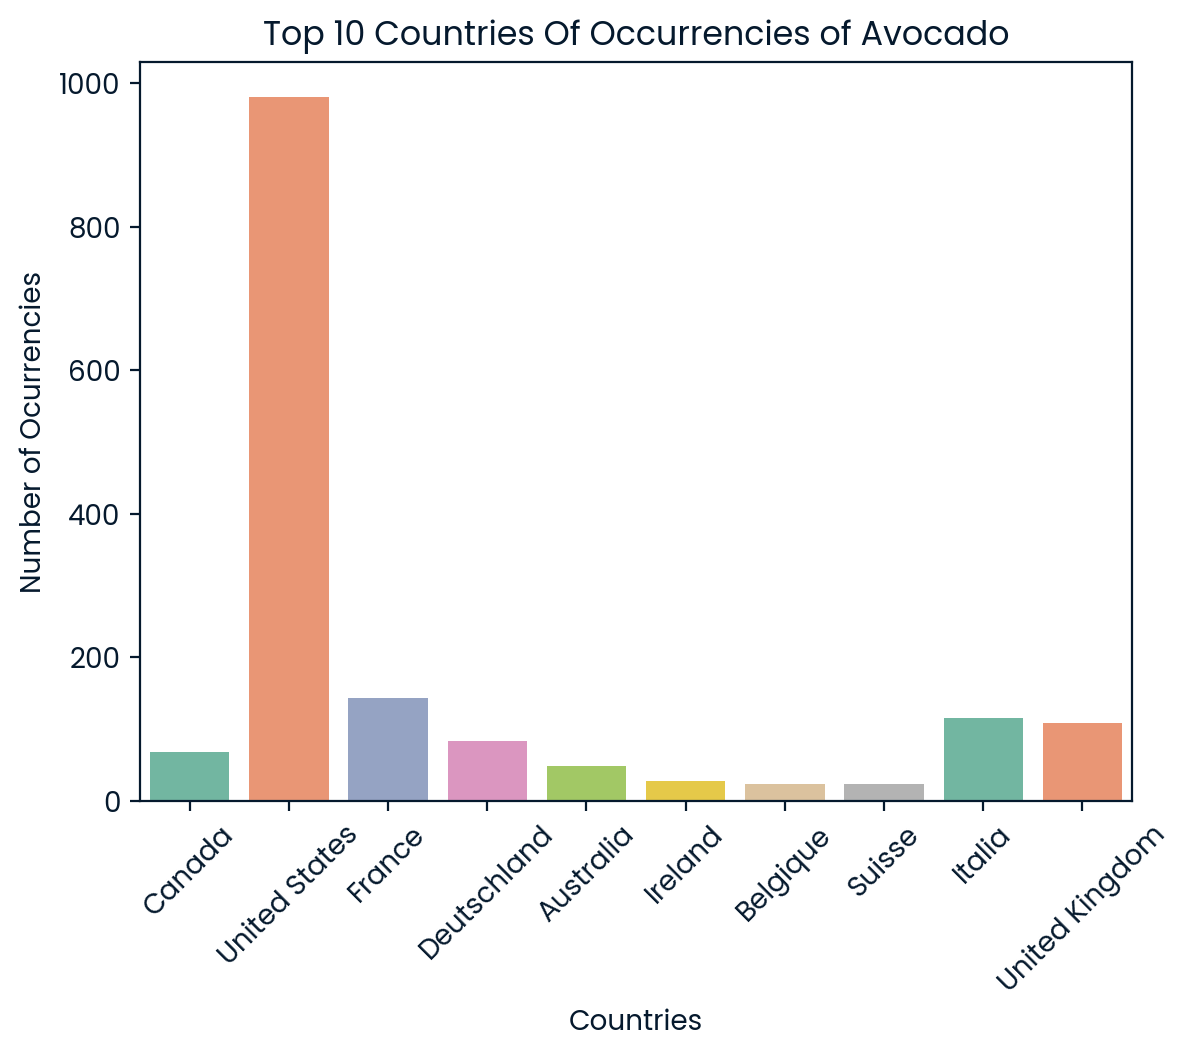

In [158]:
# COUNTS COUNTRY
countries_avocado = avocado['countries'].value_counts()

# MOST 10 FREQUENCIES COUNTRIES
top_10_countries = countries_avocado.head(10).index

# ONLY TOP 10
avocado_top_10 = avocado[avocado['countries'].isin(top_10_countries)]

# VIZ
sns.countplot(x='countries', data=avocado_top_10, palette='Set2')
plt.title('Top 10 Countries Of Occurrencies of Avocado')
plt.xlabel('Countries')
plt.ylabel('Number of Ocurrencies')
plt.xticks(rotation=45)
plt.show()


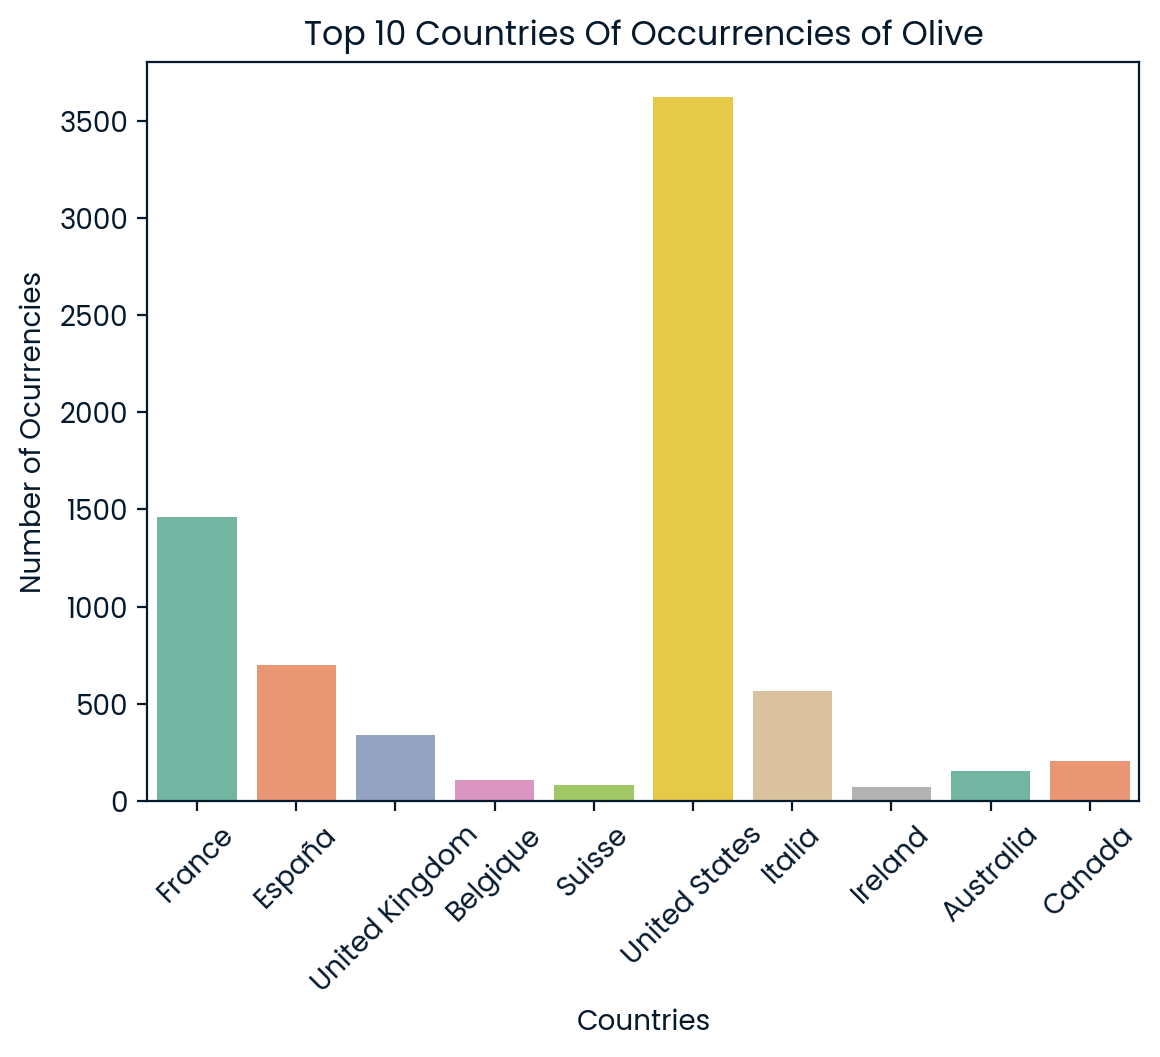

In [159]:
# COUNTS COUNTRY
countries_olive = olive_oil['countries'].value_counts()

# MOST 10 FREQUENCIES COUNTRIES
top_10_countries_olive = countries_olive.head(10).index

# ONLY TOP 10
olive_top_10 = olive_oil[olive_oil['countries'].isin(top_10_countries_olive)]

# VIZ
sns.countplot(x='countries', data=olive_top_10, palette='Set2')
plt.title('Top 10 Countries Of Occurrencies of Olive')
plt.xlabel('Countries')
plt.ylabel('Number of Ocurrencies')
plt.xticks(rotation=45)
plt.show()


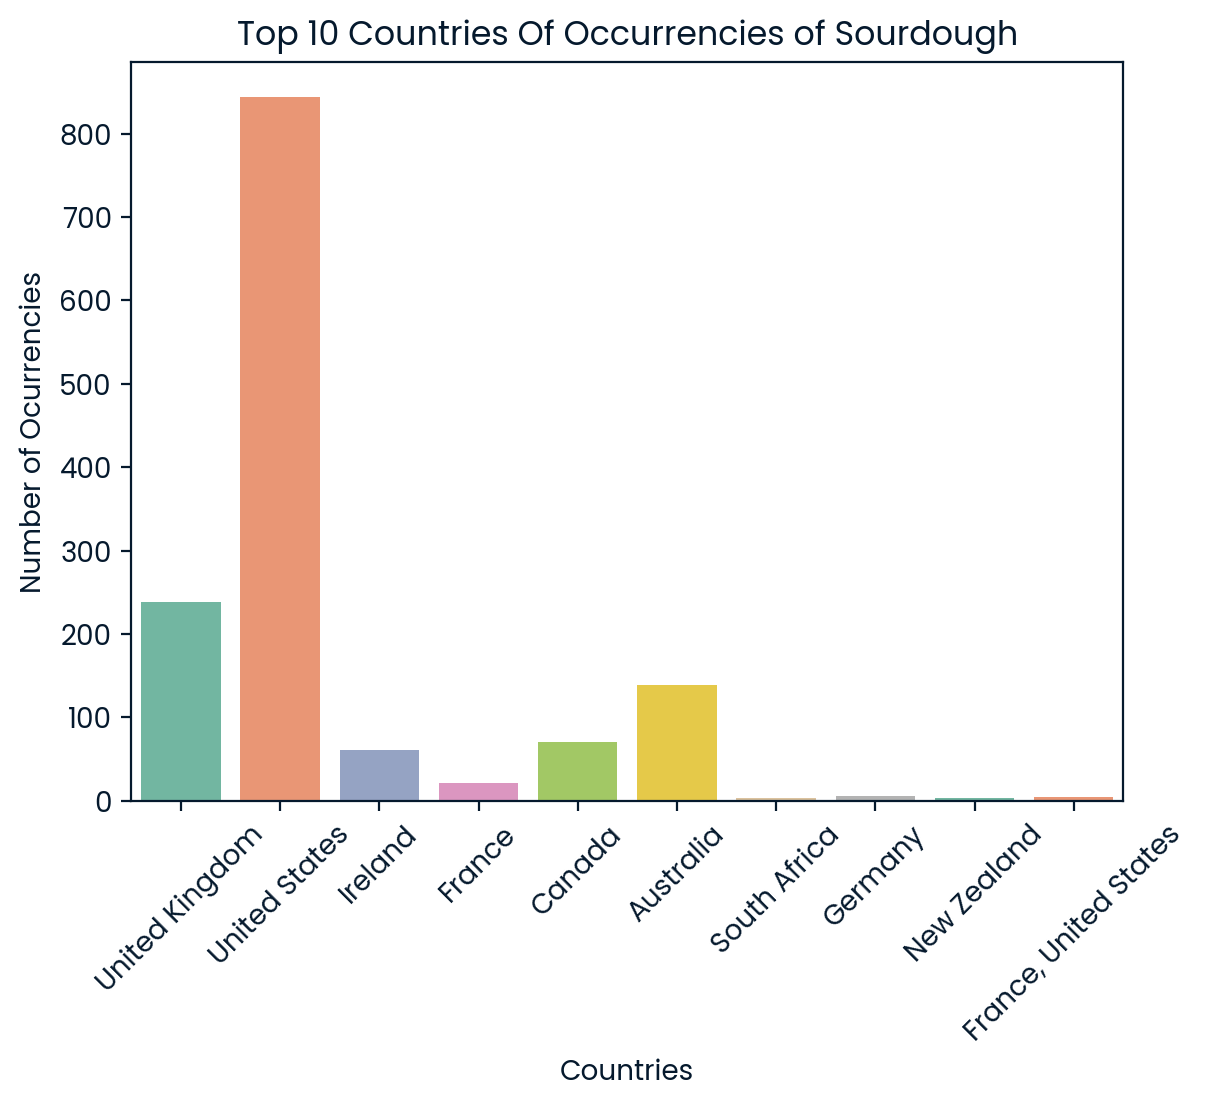

In [160]:
# COUNTS COUNTRY
countries_sourdough = sourdough['countries'].value_counts()

# MOST 10 FREQUENCIES COUNTRIES
top_10_countries_sourdough = countries_sourdough.head(10).index

# ONLY TOP 10
sourdough_top_10 = sourdough[sourdough['countries'].isin(top_10_countries_sourdough)]

# VIZ
sns.countplot(x='countries', data=sourdough_top_10, palette='Set2')
plt.title('Top 10 Countries Of Occurrencies of Sourdough')
plt.xlabel('Countries')
plt.ylabel('Number of Ocurrencies')
plt.xticks(rotation=45)
plt.show()

In [161]:
relevant_columns = ['code', 'lc', 'product_name_en', 'quantity', 'serving_size', 'packaging_tags', 
                    'brands', 'brands_tags', 'categories_tags', 'labels_tags', 'countries', 
                    'countries_tags', 'origins', 'origins_tags']
avocado = avocado[relevant_columns]

relevant_avocado_categories = pd.read_csv("data/relevant_avocado_categories.txt", header=None).squeeze().tolist()

avocado_cleaned = avocado.dropna(subset=['categories_tags'])
avocado_cleaned['categories_tags'] = avocado_cleaned['categories_tags'].str.split(',')

mask = avocado_cleaned['categories_tags'].apply(
    lambda tags: any(tag.strip() in relevant_avocado_categories for tag in tags)  # <- Agora está fechado
)
relevant_avocado = avocado_cleaned[mask]

avocado_uk = relevant_avocado[relevant_avocado['countries'] == 'United Kingdom']
avocado_uk_cleaned = avocado_uk.dropna(subset=['origins_tags'])

avocado_uk_counts = avocado_uk_cleaned['origins_tags'].value_counts()
top_avocado_origin_uk = avocado_uk_counts.index[0]

top_avocado_origin = top_avocado_origin_uk.lstrip("en:").replace("-", " ")

print("Top avocado origin:", top_avocado_origin)

Top avocado origin: peru


In [162]:
olive_oil = olive_oil[relevant_columns]

relevant_olive_oil_categories = pd.read_csv("data/relevant_olive_oil_categories.txt", header=None).squeeze().tolist()

olive_oil_cleaned = olive_oil.dropna(subset=['categories_tags'])
olive_oil_cleaned['categories_tags'] = olive_oil_cleaned['categories_tags'].str.split(',')

mask2 = olive_oil_cleaned['categories_tags'].apply(
    lambda tags: any(tag.strip() in relevant_olive_oil_categories for tag in tags)
)
relevant_olive_oil = olive_oil_cleaned[mask2]

olive_oil_uk = relevant_olive_oil[relevant_olive_oil['countries'] == 'United Kingdom']
olive_oil_uk_cleaned = olive_oil_uk.dropna(subset=['origins_tags'])

olive_oil_uk_counts = olive_oil_uk_cleaned['origins_tags'].value_counts()
top_olive_oil_origin_uk = olive_oil_uk_counts.index[0]

top_olive_oil_origin = top_olive_oil_origin_uk.lstrip("en:").replace("-", " ")

print("Top olive_oil origin:", top_olive_oil_origin)

Top olive_oil origin: greece


In [163]:

sourdough = sourdough[relevant_columns]

relevant_sourdough_categories = pd.read_csv("data/relevant_sourdough_categories.txt", header=None).squeeze().tolist()


sourdough_cleaned = sourdough.dropna(subset=['categories_tags'])
sourdough_cleaned['categories_tags'] = sourdough_cleaned['categories_tags'].str.split(',')


mask = sourdough_cleaned['categories_tags'].apply(
    lambda tags: any(tag.strip() in relevant_sourdough_categories for tag in tags)
)
relevant_sourdough = sourdough_cleaned[mask]

sourdough_uk = relevant_sourdough[relevant_sourdough['countries'] == 'United Kingdom']
sourdough_uk_cleaned = sourdough_uk.dropna(subset=['origins_tags'])

sourdough_uk_counts = sourdough_uk_cleaned['origins_tags'].value_counts()
top_sourdough_origin_uk = sourdough_uk_counts.index[0]

top_sourdough_origin = top_sourdough_origin_uk.lstrip("en:").replace("-", " ")

print("Top sourdough origin:", top_sourdough_origin)

Top sourdough origin: united kingdom
